# Generate a True Random Dice Roller

In [1]:
from qiskit import *

### Dynamic Circuit Generation Function

In [2]:
def diceCircuit(circuit,qr,cr):
    for i in range(len(qr)):
        circuit.h(qr[i])
    circuit.measure(qr,cr)
    return circuit

### Initialize Quantum Registers and Classical Register. Generate dice circuit. 

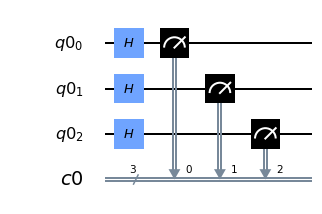

In [3]:
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)
circuit = diceCircuit(circuit,qr,cr)
circuit.draw(output='mpl')

### Circuit Exectuion/Simulation

In [4]:
simulator = Aer.get_backend('qasm_simulator') # From Qiskit's Aer package we select qasm (quantum assembly) simulator
result = execute(circuit,backend=simulator).result() # Execute our circuit with backend as the qasm simulator and store the results

### Result Visualization

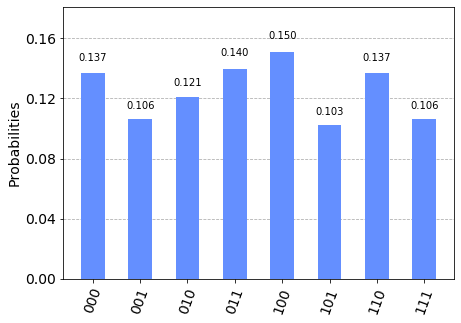

In [5]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

### Raw Data of Results

In [7]:
result = result.data()
print("Results Recevied : ",result["counts"])

AttributeError: 'dict' object has no attribute 'data'

### As a dice has states 1 to 6 , filtering states 0 and 7.

In [ ]:

result = result["counts"]
del result['0x0']
del result['0x7']
print(result)

### When n qubits are in a state of superposition, it is said to be in 2^n states simultaneously. On measuring, it has a probability of 1/root(2^n) to converge into any one of the states. Theorically, this probability holds good for infinite shots/iterations of repeating the above steps. When we perform these steps finite number of times, probabilities of these steps will differ slightly.
### _Every iteration will have a state with max and min probability. Taking advatange of this fact, we choose either max/min to represent random dice roll._ ### 

In [ ]:
roll = min(result, key=result.get)
print("Number rolled = ",int(roll, 16))